In [39]:
import pandas as pd
from dateutil.relativedelta import relativedelta
from common import Data
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from common import NWSL, Fonts, Images

In [14]:
stats = Data.get_nwsl_player_stats()
players = Data.get_nwsl_players()
df = stats.set_index("player")[["season", "date", "team", "goals"]].join(
    players.set_index("name")[["birthday"]]
)
df = df.dropna()
df = df.reset_index().rename(columns={"index": "player"})
df["date"] = pd.to_datetime(df["date"])
df["birthday"] = pd.to_datetime(df["birthday"])
df["age"] = df.apply(lambda x: relativedelta(x["date"], x["birthday"]).years, axis=1)
df

<ipython-input-14-16fa5cf3441c>:1: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  stats = Data.get_nwsl_player_stats()


,player,season,date,team,goals,birthday,age
0,Abby Dahlkemper,2016,2016-05-27,WNY,1.0,1993-05-13,23
1,Abby Dahlkemper,2016,2016-09-24,WNY,1.0,1993-05-13,23
2,Abby Dahlkemper,2023,2023-08-25,SD,1.0,1993-05-13,30
3,Abby Dahlkemper,2020 Fall Series,2020-09-12,NC,1.0,1993-05-13,27
4,Abby Erceg,2016,2016-07-09,WNY,2.0,1989-11-20,26
...,...,...,...,...,...,...,...
2165,Yuki Ogimi Nagasato,2019,2019-09-21,CHI,1.0,1987-07-15,32
2166,Yuki Ogimi Nagasato,2019,2019-09-28,CHI,1.0,1987-07-15,32
2167,Yuki Ogimi Nagasato,2023,2023-03-25,CHI,1.0,1987-07-15,35
2168,Yuki Ogimi Nagasato,2023 Challenge Cup,2023-08-05,CHI,1.0,1987-07-15,36


In [21]:
df2 = df[df["season"] == "2023"].groupby(["team", "age"]).agg({"goals": "sum"}).reset_index()
df2["prod"] = df2["age"] * df2["goals"]
df2 = df2.groupby("team").agg({"prod": "sum", "goals": "sum"})
df2["avg_age"] = df2["prod"] / df2["goals"]
df2.sort_values("avg_age")

,prod,goals,avg_age
team,,,
WAS,611.0,25.0,24.440000
NC,673.0,27.0,24.925926
HOU,400.0,16.0,25.000000
POR,1085.0,42.0,25.833333
LA,761.0,29.0,26.241379
CHI,658.0,25.0,26.320000
LOU,633.0,24.0,26.375000
SD,798.0,30.0,26.600000
KC,789.0,29.0,27.206897


In [36]:
goals = (
    df[df["season"] == "2023"].rename(columns={"season": "year"})
    .groupby(["team", "year", "age"])
    .agg({"goals": "sum"})
    .reset_index()
    .pivot(index=["team", "year"], columns="age", values="goals")
)
goals = goals.fillna(0)
goals

,age,17,18,19,20,21,22,23,24,25,26,...,31,32,33,34,35,36,37,38,39,40
team,year,,,,,,,,,,,,,,,,,,,,,
CHI,2023,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,6.0,4.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
HOU,2023,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KC,2023,0.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,4.0,2.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LA,2023,0.0,4.0,0.0,0.0,0.0,2.0,2.0,0.0,4.0,2.0,...,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
LOU,2023,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,6.0,5.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
NC,2023,0.0,0.0,1.0,0.0,0.0,0.0,12.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NJY,2023,0.0,0.0,0.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
ORL,2023,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,0.0,7.0,...,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
POR,2023,2.0,0.0,0.0,0.0,0.0,11.0,1.0,2.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [38]:
goals["16-20"] = goals[17] + goals[18] + goals[19] + goals[20]
goals["21-25"] = goals[21] + goals[22] + goals[23] + goals[24] + goals[25]
goals["26-30"] = goals[26] + goals[27] + goals[28] + goals[29] + goals[30]
goals["31-35"] = goals[31] + goals[32] + goals[33] + goals[34] + goals[35]
goals["36-40"] = goals[36] + goals[37] + goals[38] + goals[39] + goals[40]
goals = goals[['16-20', '21-25', '26-30', '31-35', '36-40']]
goals

,age,16-20,21-25,26-30,31-35,36-40
team,year,,,,,
CHI,2023,0.0,15.0,7.0,2.0,1.0
HOU,2023,0.0,6.0,10.0,0.0,0.0
KC,2023,3.0,9.0,6.0,11.0,0.0
LA,2023,4.0,8.0,12.0,5.0,0.0
LOU,2023,0.0,12.0,9.0,3.0,0.0
NC,2023,1.0,15.0,11.0,0.0,0.0
NJY,2023,2.0,4.0,15.0,4.0,0.0
ORL,2023,0.0,11.0,9.0,2.0,4.0
POR,2023,2.0,21.0,16.0,0.0,3.0


<Figure size 864x864 with 0 Axes>

<Figure size 4800x4800 with 0 Axes>

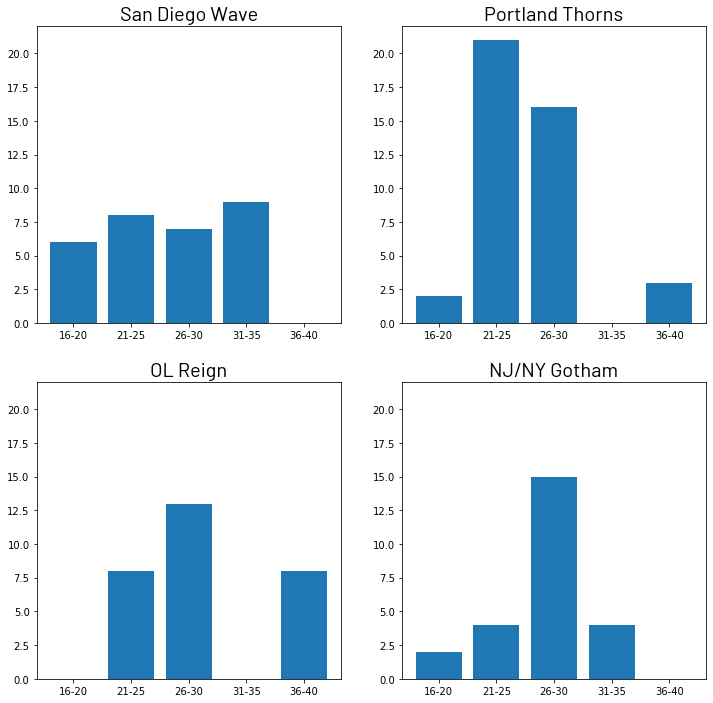

In [45]:
# General setup
plt.clf()
plt.rcParams["figure.figsize"] = (12, 12)
plt.figure(dpi=400, facecolor="white")
fig, axs = plt.subplots(2, 2)
fig.patch.set_facecolor("white")

for i, team in enumerate(["SD", "POR", "RGN", "NJY"]):
    ax = axs[int(i / 2), i % 2]

    # Set title
    ax.set_title(NWSL.name(team), fontproperties=Fonts.BARLOW, size=20)
    
    # Plot bar chart
    ax.bar(goals.columns, goals.loc[team, "2023"])
    
    ax.set_ylim(0, 22)

In [42]:
goals.loc["SD", "2023"]

age
16-20    6.0
21-25    8.0
26-30    7.0
31-35    9.0
36-40    0.0
Name: (SD, 2023), dtype: float64